<a href="https://colab.research.google.com/github/sauravkumar19/Hotel_booking_data_analysis/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<b>HOTEL BOOKING ANALYSIS<b>

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

Explore and analyze the data to discover important factors that govern the bookings.

##We are using the following libraries:
- Numpy: We will use numpy arrays as they are comparitively faster than lists, also columns of dataframes behaves as numpy arrays

- Pandas: for reading the data from csv file, for data clening and for preparing data for analysis

- matplotlib,seabors: for different visualisations, for drawing conclusions from data and for exploratory data analysis. 

In [ ]:
#required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Loading CSV file from google drive in colab enviroment
We will first load our csv file in which data is stored to the colab enviroment in data frame format so that we can perform the required cleaning and analysis.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path="/content/drive/My Drive/AlmaBetter_Capstone_projects/Capstone_project1_eda/Hotel Bookings.csv"
hotels_original=pd.read_csv(path)
hotels=hotels_original.copy()
type(hotels)  #the type of hotels if of pandas dataframe type

Mounted at /content/drive


pandas.core.frame.DataFrame

In [ ]:
#first five columns of data to have a general view how the data looks like.
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#DATA DESCRIPTION

The data set is a combination of different types of variables among which some are categorical variables and the others are discrete variables.

To make required analysis from the given raw data we have to perform following steps:

**step1 [Understanding the data deeply]**: Read the data thoroughly and understand the connections between different attributes

**step2 [Data Cleaning]**: This data is raw data so it contains lot of noise and null values so we  have to remove it for proper analysis with minimum or no error.

**step3 [Analysing and Concluding]**: After data cleaing, data is ready for further analysis, so we make required analysis and visulisation for various attributes of data and for required combinations of attributes of data.




##Details of data

In [ ]:
hotels.info() #information about all the attribute present in the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotels.describe(include = ['object']) #a brief description of all the categorical variables
"""
from this we can make conclusions like
- city hotels are preferred over resort hotels
- Maximum customers arrives in august
- total number of meals available are 5
etc etc.....
"""

'\nfrom this we can make conclusions like\n- city hotels are preferred over resort hotels\n- Maximum customers arrives in august\n- total number of meals available are 5\netc etc.....\n'

##DATA CLEANING
For data cleaning:

- We removed the duplicate rows.
- We remove rows and columns having more than 80% of entries unavailable(null).
- We replace the remaing null values with the best possible values.
- As in this data has some  continuous attributes so there is need to remove outliers.

Now after making required cleaning the data is ready for visualisation

In [ ]:
print(f"shape of data before cleaning: {hotels.shape}")

shape of data before cleaning: (119390, 32)


In [ ]:
#to print the percentage of null values in each column
null_percent=pd.Series()
for col in hotels.columns:
  null_percent[col]=((hotels.shape[0]-hotels[col].count())/(hotels.shape[0]))*100
print(null_percent)
#we note that only 4 attributes have null values and company have more than 90% of the values null.

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
#preserving columns having at least 20% of not null values
hotels.dropna(axis=1,inplace=True,thresh=(0.2*hotels.shape[0]))

#preserving rows having at least 20% of not null values
hotels.dropna(axis=0,inplace=True,thresh=(0.2*hotels.shape[1]))

#the columns named company and some rows will get deleted from the dataset.

In [ ]:
# replacing Nan value from chidren and agent columns with 0
hotels['children'].fillna(0, inplace = True)   #we assume if the number of childrens are not available than there is a high probabilty that it is 0.
hotels['agent'].fillna(0, inplace = True)      #if agent id is not available we assume it to be 0 which means an intermediate agent is not involved.

In [ ]:
# replacing Nan value of country column and consider that those countries are some other countries which are not of that much important
hotels['country'].fillna('other', inplace = True)      

In [ ]:
hotels.drop_duplicates(inplace=True,ignore_index=True)

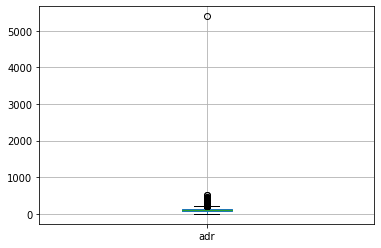

In [ ]:
hotels[["adr"]].boxplot()

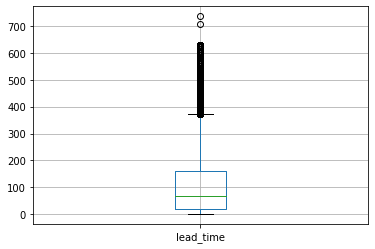

In [ ]:
hotels[["lead_time"]].boxplot()

In [ ]:
#removing outliers from adr and lead time column
continuous_columns=["lead_time","adr"]
for c in continuous_columns:
  Q1=np.quantile(hotels[c],0.25)
  Q3=np.quantile(hotels[c],0.75)
  IQR= Q3 - Q1
  upper=np.where(hotels[c]>=(Q3+1.5*IQR))
  #print(upper[0])
  lower=np.where(hotels[c]<=(Q1-1.5*IQR))    #it will be a tuple
  #print(lower)
  upper=np.unique(np.append(upper[0],lower[0]))
  hotels.index=np.arange(0,hotels.shape[0])
  hotels.drop(upper, inplace = True)      #we have indexed it to make it a nummmpy array

through boxplots we note that the outliers are removed now

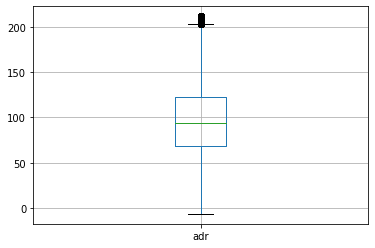

In [ ]:
hotels[["adr"]].boxplot()

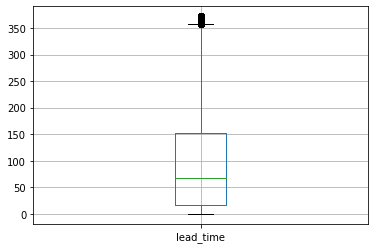

In [ ]:
hotels[["lead_time"]].boxplot()

In [ ]:
#null percentage after cleaning data
null_percentage = (hotels.isnull().sum()/len(hotels))*100
null_percentage

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

In [ ]:
print(f"shape of data after cleaning: {hotels.shape}")

shape of data after cleaning: (112589, 31)


In [ ]:
#adding columns total_guest and day_stay to hotel data set
hotels['total_guest'] = hotels['adults'] + hotels['children']
hotels['day_stay'] =hotels['stays_in_weekend_nights'] + hotels['stays_in_week_nights']

##EDA: (Exploratory Data Analysis)

- we selected an attribute, then check it's relation and dependencies of other attributes.
- Analyses it's division using pieplots
- Compare different categories of an attribute through bar graphs, histograms, line plot etc.
- We draw insights from those graphs which can prove beneficial for both hotels and customers

** TYPES OF HOTELSS**
- There are two types of hotels in the given dataset: city hotels, resort hotels
- we will check which type of hotel have more demand
- For which hotel cancelation rate is more
- In what condition which type of hotels will be better to choose

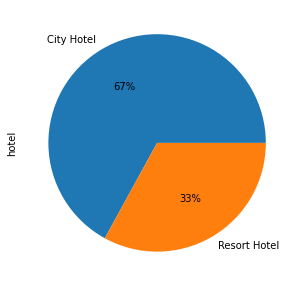

In [ ]:
# which type of hotel book more
hotel_type = hotels['hotel'].value_counts()
hotel_type.plot(kind = 'pie',figsize = (5,5),autopct='%1.0f%%')

**Inference**

Peoples prefer city hotels over resort hotels

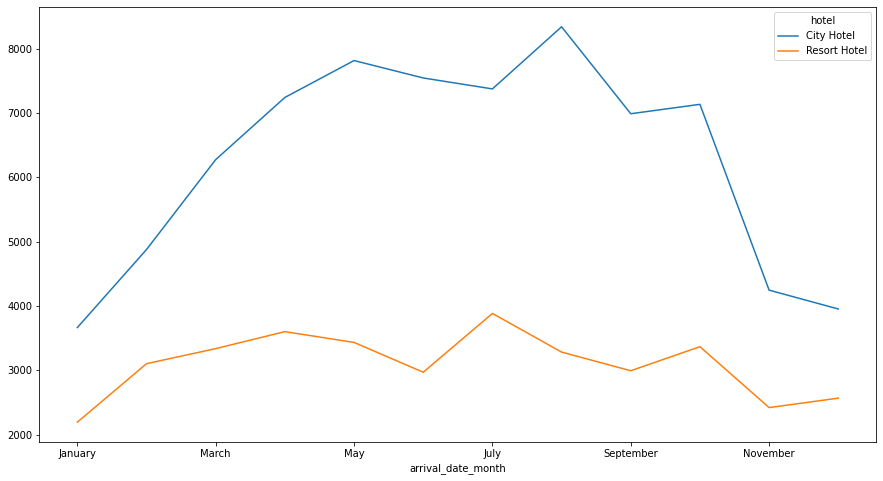

In [ ]:
#In which month, hotel booking is maximum and minimum 
arrival_months = pd.crosstab(hotels['arrival_date_month'],hotels['hotel'])
arrival_months = arrival_months.reindex(['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
arrival_months.plot(kind = 'line', y = ['City Hotel','Resort Hotel'], figsize=(15,8))

**INFERENCE:** 

City hotel was more booked from the month April to October and maximum booked in the month of August, whereas Resort hotel was more booked in the month April, July, october and maximum booked in july. 

In [ ]:
# Requried parking space
parking_space = pd.crosstab(hotels['required_car_parking_spaces'],hotels['hotel'])
parking_space['City Hotel'] = parking_space['City Hotel'].apply(lambda x: round((x/parking_space['City Hotel'].sum())*100,2))
parking_space['Resort Hotel'] = parking_space['Resort Hotel'].apply(lambda x: round((x/parking_space['Resort Hotel'].sum())*100,2))
parking_space

hotel,City Hotel,Resort Hotel
required_car_parking_spaces,,
0,97.56,86.52
1,2.44,13.41
2,0.00,0.06
3,0.00,0.00
8,0.00,0.01


Text(0, 0.5, 'percentage of car parking requriment')

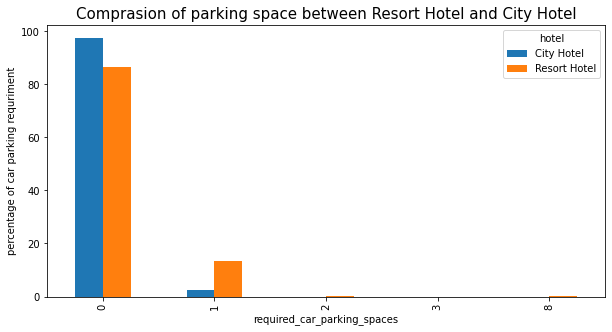

In [ ]:
parking_space.plot(kind = 'bar', y = ['City Hotel','Resort Hotel'], figsize = (10,5))
plt.title('Comprasion of parking space between Resort Hotel and City Hotel',fontsize = 15)
plt.ylabel('percentage of car parking requriment',fontsize = 10)

**Inference:**

car parking requirements are more for resort hotels, so they may work on their parking facilities

In [ ]:
Hotels_stay = hotels.groupby(['day_stay','hotel'])['day_stay'].count().unstack()
Hotels_stay.fillna(0, inplace = True)
Hotels_stay.head()

hotel,City Hotel,Resort Hotel
day_stay,,
0,331.0,381.0
1,12701.0,7550.0
2,19669.0,5816.0
3,20289.0,5240.0
4,12311.0,4326.0


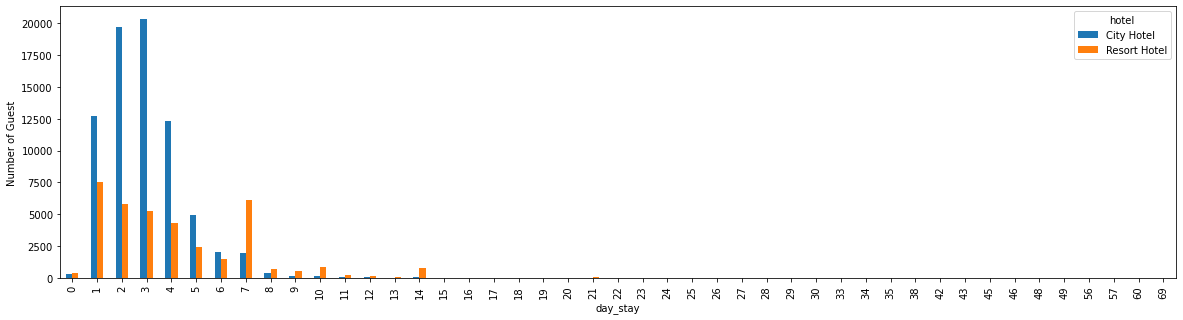

In [ ]:
Hotels_stay.plot(kind = 'bar', y = ['City Hotel','Resort Hotel'],figsize =(20,5), ylabel = 'Number of Guest')

**INFERENCE:**

Tourist generally booked the resort hotel for the long term stay and city hotel for the short term stay.

In [ ]:
# Most meal type prefered by guest
hotels.groupby(['hotel','meal']).count()


is_canceled  lead_time  arrival_date_year  \
hotel        meal                                                   
City Hotel   BB               59181      59181              59181   
             FB                  43         43                 43   
             HB                5663       5663               5663   
             SC               10562      10562              10562   
Resort Hotel BB               28380      28380              28380   
             FB                 675        675                675   
             HB                6897       6897               6897   
             SC                  83         83                 83   
             Undefined         1105       1105               1105   

                        arrival_date_month  arrival_date_week_number  \
hotel        meal                                                      
City Hotel   BB                      59181                     59181   
             FB                         43                        43   
             HB                       5663                      5663   
             SC                      10562                     10562   
Resort Hotel BB                      28380                     28380   
             FB                        675                       675   
             HB                       6897                      6897   
             SC                         83                        83   
             Undefined                1105                      1105   

                        arrival_date_day_of_month  stays_in_weekend_nights  \
hotel        meal                                                            
City Hotel   BB                             59181                    59181   
             FB                                43                       43   
             HB                              5663                     5663   
             SC                             10562                    10562   
Resort Hotel BB                             28380                    28380   
             FB                               675                      675   
             HB                              6897                     6897   
             SC                                83                       83   
             Undefined                       1105                     1105   

                        stays_in_week_nights  adults  children  ...  agent  \
hotel        meal                                               ...          
City Hotel   BB                        59181   59181     59181  ...  59181   
             FB                           43      43        43  ...     43   
             HB                         5663    5663      5663  ...   5663   
             SC                        10562   10562     10562  ...  10562   
Resort Hotel BB                        28380   28380     28380  ...  28380   
             FB                          675     675       675  ...    675   
             HB                         6897    6897      6897  ...   6897   
             SC                           83      83        83  ...     83   
             Undefined                  1105    1105      1105  ...   1105   

                        days_in_waiting_list  customer_type    adr  \
hotel        meal                                                    
City Hotel   BB                        59181          59181  59181   
             FB                           43             43     43   
             HB                         5663           5663   5663   
             SC                        10562          10562  10562   
Resort Hotel BB                        28380          28380  28380   
             FB                          675            675    675   
             HB                         6897           6897   6897   
             SC                           83             83     83   
             Undefined                  1105         

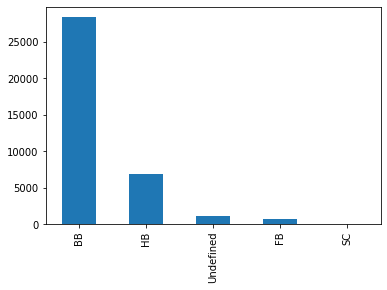

In [ ]:
hotels.loc[hotels['hotel']=="Resort Hotel"]["meal"].value_counts().plot(kind = 'bar')


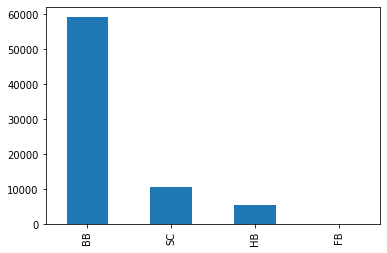

In [ ]:
hotels.loc[hotels['hotel']=="City Hotel"]["meal"].value_counts().plot(kind = 'bar')

**INFERENCE:** 

- Bead and Breakfast(BB) is the most common meal prefer by the guest. In BB meal, breakfast is included in the room rent
- FB meal is only choosed in resort hotels not in city hotels


In [ ]:
# Most of the hotel booked in which country
hotels['country'].unique()
max_country = pd.crosstab(hotels['country'],hotels['hotel'])
max_country['total_booking'] = max_country['City Hotel'] + max_country['Resort Hotel']
max_country = max_country.sort_values('total_booking',ascending = False).head(10)
max_country

hotel,City Hotel,Resort Hotel,total_booking
country,,,
PRT,28821,16366,45187
GBR,5044,6469,11513
FRA,8593,1510,10103
ESP,4476,3417,7893
DEU,5585,1167,6752
ITA,3254,409,3663
IRL,1190,2112,3302
BEL,1860,425,2285
BRA,1769,395,2164


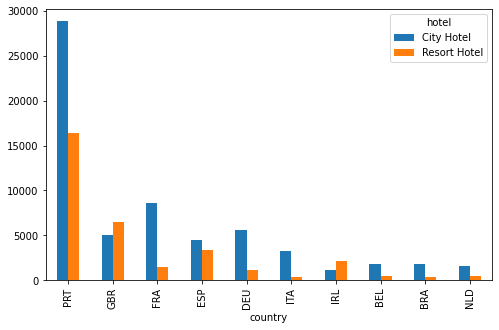

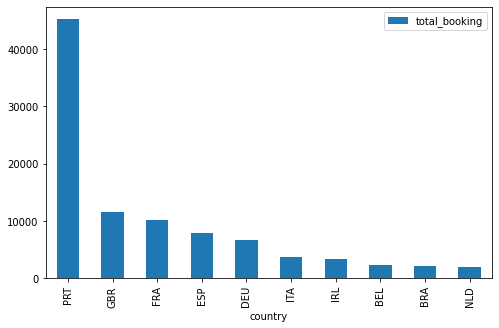

In [ ]:
max_country.plot(kind = 'bar',y = ['City Hotel','Resort Hotel'],figsize = (8,5))
max_country.plot(kind = 'bar',y = 'total_booking',figsize = (8,5))

**INFERENCE:** 

Protugal has maximum hotel booking followed by Great Britian and France. In Protugal city hotel is more booked than resort hotel, wheras in Britain resort hotel is more booked than city hotel.

**IS_CANCELED**

One of the important attribute is is_canceled which shows whether a booking is canceled(1) or not(0), so we can visualize this column and can draw following conclusions:
- In which month cancelation is more
- How rate of cancelation changes year to year
- For what adr cancelation have high probability
- For what market_segment cancelation is done more

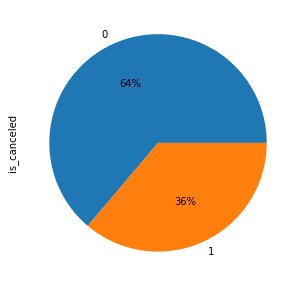

In [ ]:
# canceling hotel booking
hotel_type = hotels['is_canceled'].value_counts()
hotel_type.plot(kind = 'pie',figsize = (5,5),autopct='%1.0f%%')

**INFERENCE:**

About 36% reservation in hotels is cancel after booking.

Now we will check what are conditions when the booking is canceled and analyse the relation of column is_canceled with other columns

In [ ]:
#
#in which month the tickets are cancelled the most: this is to make sure whether hotel can take an extra entry or not.
canceled_month=pd.crosstab(hotels["arrival_date_month"],hotels["is_canceled"])
canceled_month=pd.DataFrame(canceled_month,index= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] )
canceled_month

is_canceled,0,1
January,4118,1739
February,5356,2623
March,6623,2988
April,6473,4368
May,6922,4325
June,6138,4375
July,7105,4152
August,7320,4302
September,6182,3798
October,6633,3867


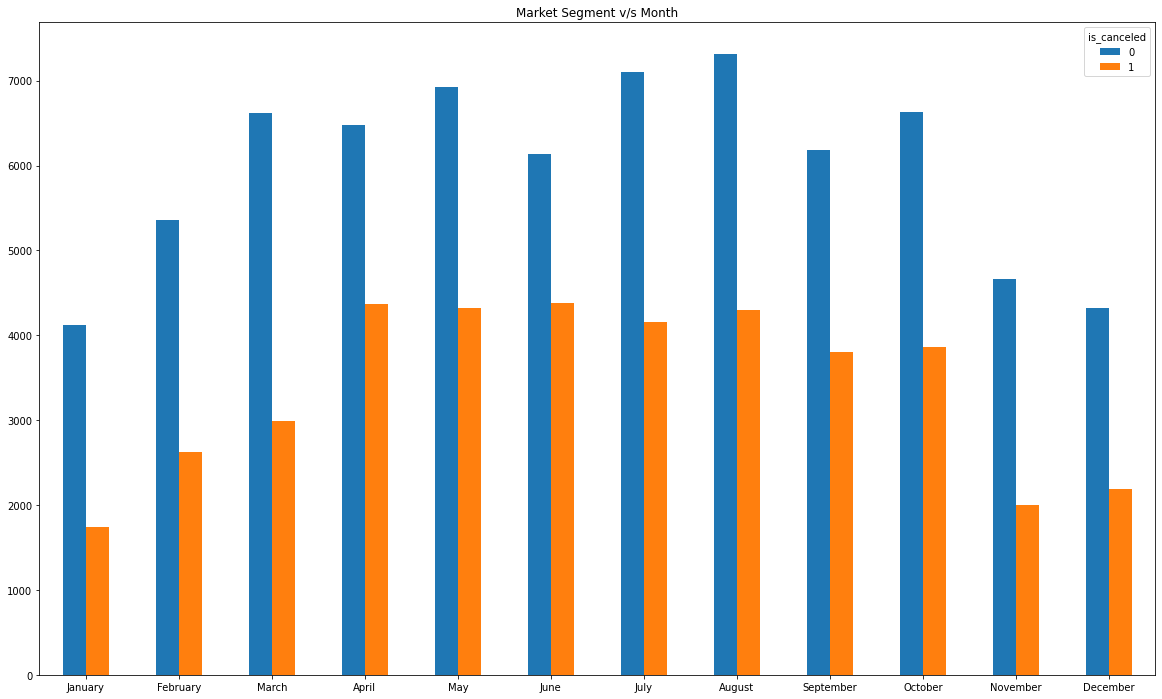

In [ ]:
#
canceled_month.plot(kind="bar", figsize=(20,12),title="Market Segment v/s Month", rot=0)

In [ ]:
data=hotels["market_segment"].value_counts()
# to judge which agent is better 
segment_cancelled=pd.crosstab(hotels["is_canceled"],hotels["market_segment"])
segment_cancelled_percentage=segment_cancelled.copy()

In [ ]:
for i in list(data.keys()):
  segment_cancelled_percentage[i][0]=(segment_cancelled[i][0]/data[i])*100
  segment_cancelled_percentage[i][1]=(segment_cancelled[i][1]/data[i])*100

In [ ]:
#
segment_cancelled_percentage

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
is_canceled,,,,,,,,
0,78,86,81,85,40,65,63,0
1,21,13,18,14,59,34,36,100


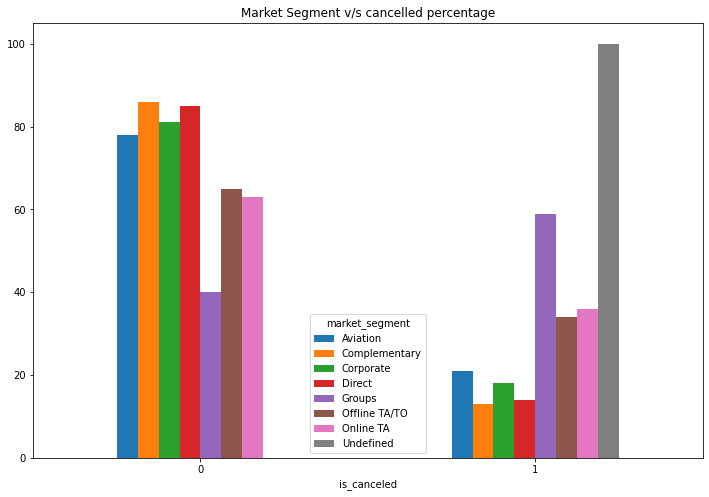

In [ ]:
#
segment_cancelled_percentage.plot(kind="bar", figsize=(12,8),title="Market Segment v/s cancelled percentage", rot=0,)

**Inference**
- canceled percentage is high for undefined type of maket segment that is bookings done through online sources have 100% chances of cancelation
- cancelation percentage is also high for grouped market segment, the bookings through them are more likely to be canceled.

so hotels can have extra boookings in the case rooms are booked by one of the two segments

**LEAD TIME**

Lead time is a very important feature for hotels it tells the  number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel:

- Which lead time is most common.
- we need to analyse that if the lead time is more, than what are the chances of cancelation of booking, so this will help the hotel to take some extra bookings for that time.
- What is the  correlation between adr and lead time

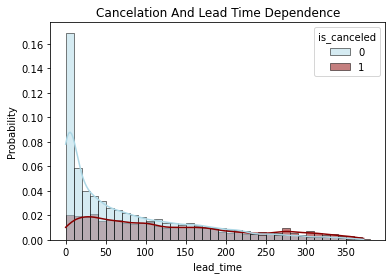

In [ ]:
#
sns.histplot(data=hotels,x="lead_time",stat="probability",binwidth=10,kde=True,linewidth=0.5,hue="is_canceled",palette=['lightblue','darkred'])
plt.title("cancelation and lead time Dependence".title())
plt.show()

**Inference:**

 Lead time of 0-10 days is most common.
We notice if the lead time exceeds 100 days than there is a higher probability that the booking gets canceled

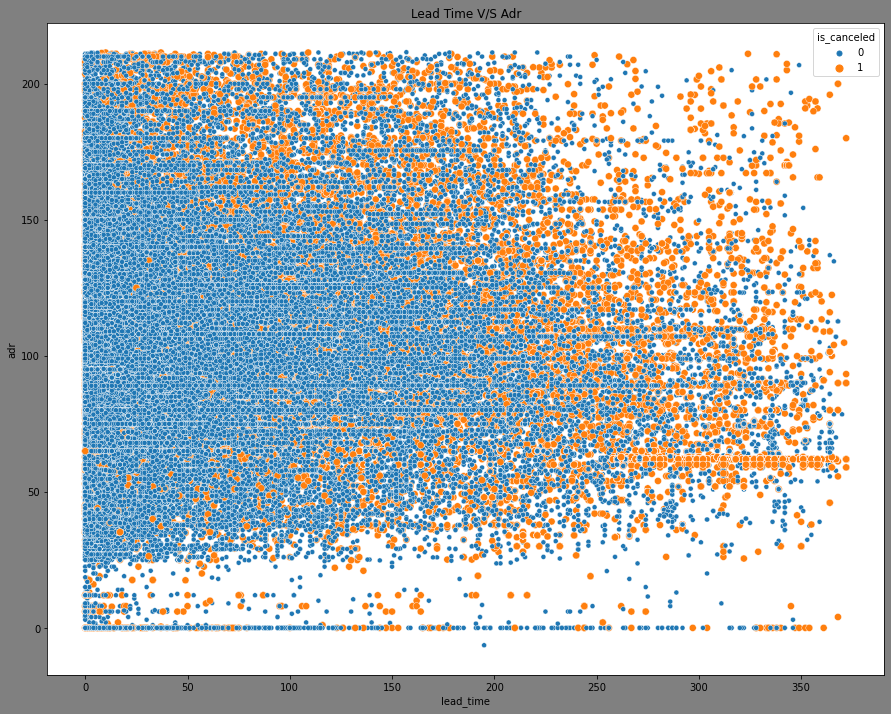

In [ ]:
#
#what are the chances of cancelation with incresing lead time: 
plt.figure(figsize=(15,12),facecolor='grey',edgecolor='orange')
plt.title("lead time v/s adr".title())
sns.scatterplot(x="lead_time",y="adr",data=hotels,hue="is_canceled",size="is_canceled",sizes={  0:25,1:50}, alpha=1, legend="brief",y_bins=[10*i for i in range(0,20)])

**INFERENCE:**

More the avarage daily rate and more the lead time dominance the high probability of cancelation in hotel industries.

 Also if the lead time is greater than 250 days, cancelation rate is high where as for higher adr cancelation depend on lead time, i.e if the lead time is less than 10 days and adr is greater than 150 then the cancelation rate is very low.

 so basically we conclude that cancelation is not affected much by adr 

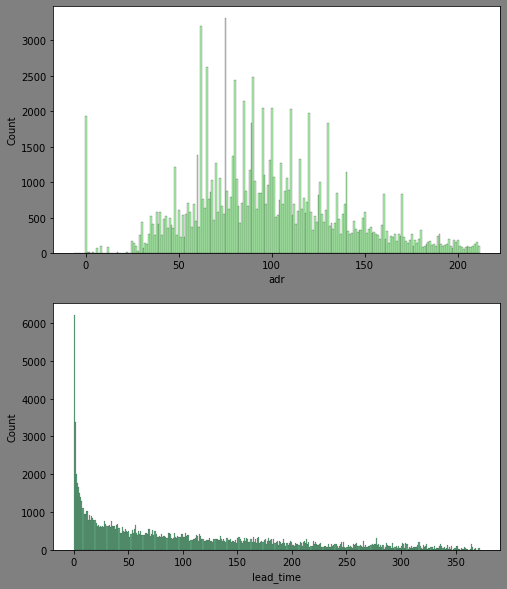

In [ ]:
fig,axs=plt.subplots(2,1,figsize=(8,10),facecolor='grey',edgecolor='orange')
sns.histplot(data=hotels,binwidth=True,x="adr",color="lightgreen",ax=axs[0])
sns.histplot(data=hotels,binwidth=True,x="lead_time",color="seagreen",ax=axs[1])

**MARKET SEGMENT**

Next important attribute which is market_segment: it is a very important feature for hotels, as it is the way how guests are coming to hotels for booking so hotels must take care of those marketing segments which are proving to be very beneficial for hotels, and invest more on important marketing segments.



In [ ]:
#
def make_pieplot(data,y_axis,title = None):
  '''
  input
  data: Pandas series for pie plotting
  y_axis: column of pandas dataframe
  title: String value for plot title

  output 
  Display a pie chart  
  '''
  explode_list = data.value_counts().tolist()
  explode_ = [0 if elem != max(explode_list) else 0.05 for elem in explode_list]
  dict_data=data.value_counts()
  dict_data.plot(kind = 'pie', y = y_axis, autopct='%1.2f%%', figsize =(15,10),explode = explode_, fontsize = 10,legend=True,rot=45)
  #plt.legend(title ='market_segment',loc ='lower right')
  plt.title(title,bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)

Online TA        53793
Offline TA/TO    23117
Groups           17690
Direct           11719
Corporate         5289
Complementary      742
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

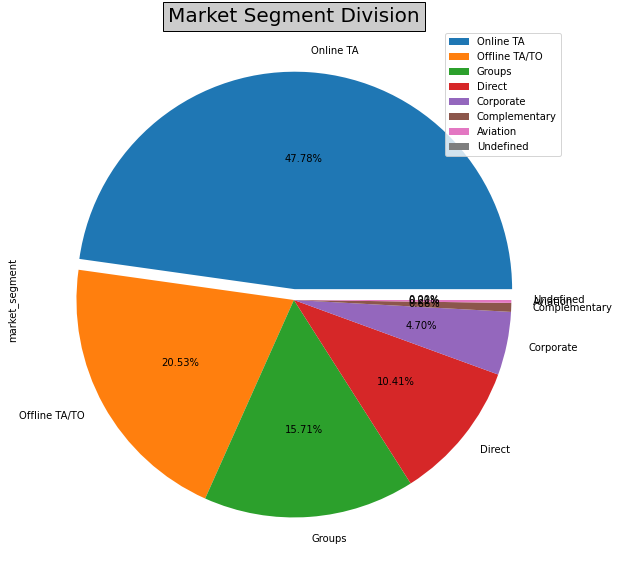

In [ ]:
#
make_pieplot(hotels["market_segment"],"market_segment","Market Segment Division")
hotels["market_segment"].value_counts()

In [ ]:
# to judge which segment is better 
segment_cancelled=pd.crosstab(hotels["is_canceled"],hotels["market_segment"])
segment_cancelled_percentage=segment_cancelled.copy()

In [ ]:
segment_month=pd.crosstab(hotels["arrival_date_month"],hotels["market_segment"])
segment_month=pd.DataFrame(segment_month,index= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] )

In [ ]:
#
segment_month.columns

Index(['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
       'Offline TA/TO', 'Online TA', 'Undefined'],
      dtype='object', name='market_segment')

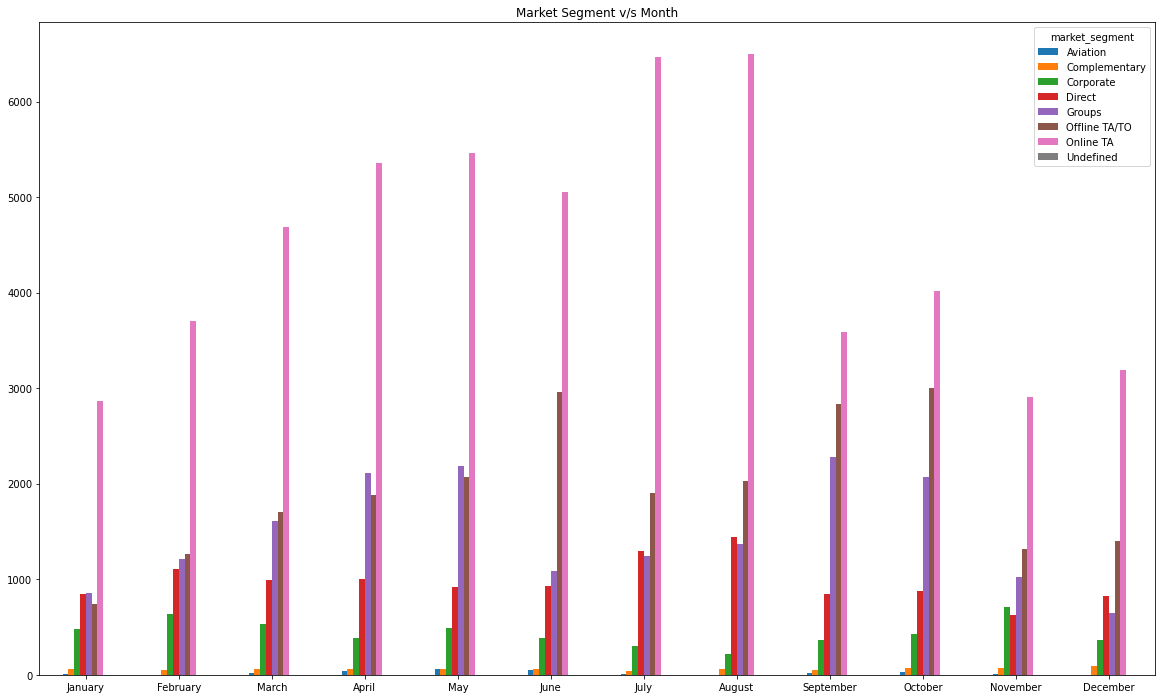

In [ ]:
#
#ax=plt.figure(figsize=(8,6),facecolor='grey',edgecolor='orange')
segment_month.plot(kind="bar", figsize=(20,12),title="Market Segment v/s Month", rot=0)

In [ ]:
segment_year=pd.crosstab(hotels["arrival_date_year"],hotels["market_segment"])
segment_year

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
arrival_date_year,,,,,,,,
2015,0,165,1170,2237,5963,6037,6051,2
2016,127,363,2561,5325,6545,12119,26750,0
2017,110,214,1558,4157,5182,4961,20992,0


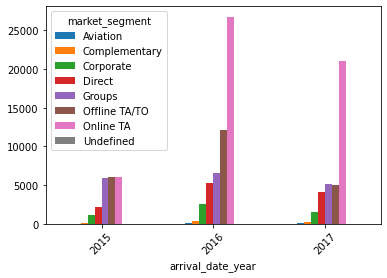

In [ ]:
#
segment_year.plot(kind="bar",rot=45)

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

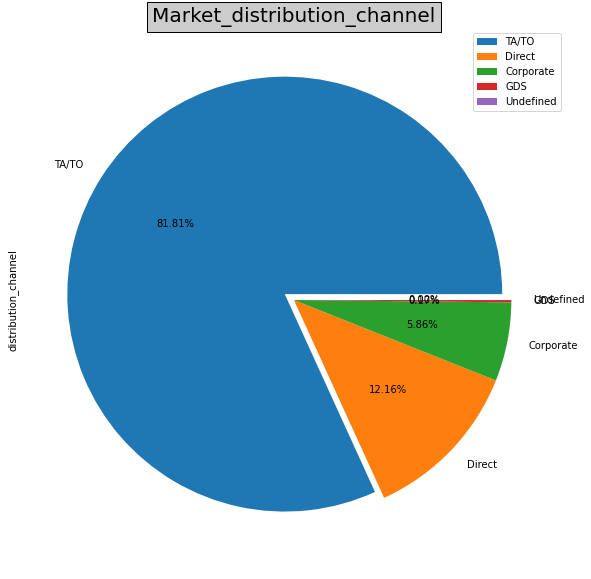

In [ ]:
make_pieplot(hotels['distribution_channel'],'distribution_channel','Market_distribution_channel')
hotels['distribution_channel'].unique()

In [ ]:
# Retention rate refers to the percentage of customers who continue paying for a product over a given timeframe.
# Calculate the retention rate of hotel industry based on market segment
retention_market_segment = pd.crosstab(hotels['market_segment'],hotels['is_repeated_guest'])
retention_market_segment['retention_rate'] = round((retention_market_segment[1]/(retention_market_segment[0]+retention_market_segment[1])*100),2)
retention_market_segment

is_repeated_guest,0,1,retention_rate
market_segment,,,
Aviation,173,64,27.00
Complementary,512,230,31.00
Corporate,3818,1471,27.81
Direct,10952,767,6.54
Groups,17425,265,1.50
Offline TA/TO,22740,377,1.63
Online TA,53207,586,1.09
Undefined,2,0,0.00


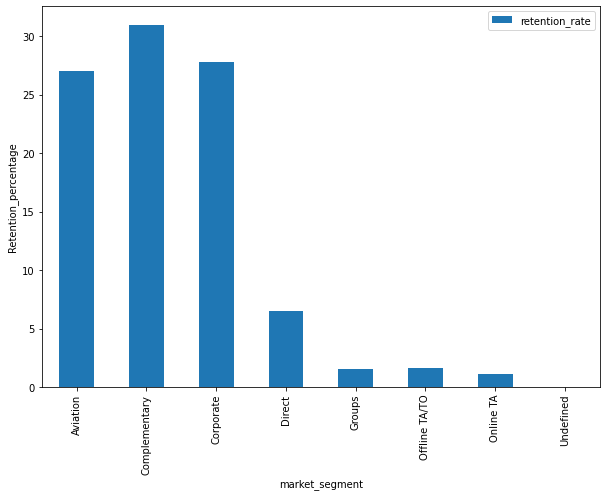

In [ ]:
retention_market_segment.plot(kind = 'bar', y = 'retention_rate', figsize = (10,7), ylabel = 'Retention_percentage')

**INFERENCE:**

Complementary market segment has maximum retention rate of 31% followed by corporate 27.81% and Aviation 27%. Whereas other market segment Direct, groups, online offline travel agencies and tour organiser have very low retention rate.

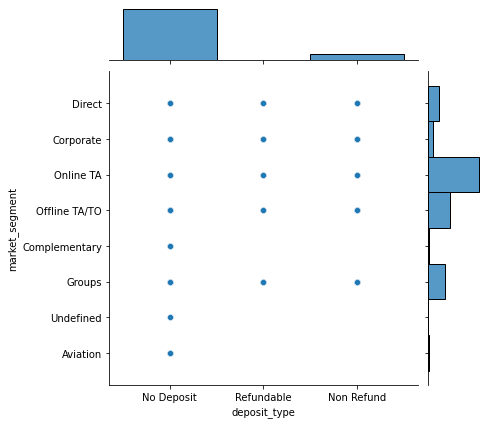

In [ ]:
sns.jointplot(y="market_segment",x="deposit_type",data=hotels)

In [ ]:
hotel_adr = hotels.groupby('hotel')['adr'].mean()

Text(0.5, 0, 'Hotel')

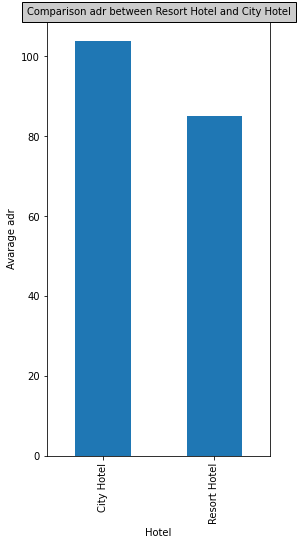

In [ ]:
hotel_adr.plot(kind = 'bar',figsize =(4,8))
plt.title('Comparison adr between Resort Hotel and City Hotel',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 10)
plt.ylabel('Avarage adr')
plt.xlabel('Hotel')

**INFERENCE:**

ADR is average daily rate, is a statistical unit that often used in logging industry. ADR tells the ability of hotels to maximize the revenue by managing the inventory

 ADR = (Room Revenue/Room Sold).


City Hotel generates more revenue than resort hotel

In [ ]:
monthly_adr =hotels.groupby(['arrival_date_month','hotel'])['adr'].mean().unstack()
monthly_adr = monthly_adr.reindex(['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
monthly_adr

hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,82.843529,49.461883
February,84.777189,55.167795
March,91.625622,57.520147
April,109.131322,77.463008
May,119.322520,78.791935
June,116.699641,107.245601
July,108.433374,139.239117
August,111.294688,155.886920
September,109.663588,92.161116


In [ ]:
monthly_adr['percentage_diff'] = round((abs(monthly_adr['City Hotel'] - monthly_adr['Resort Hotel'])/(monthly_adr['City Hotel'] + monthly_adr['Resort Hotel']))*100,2)
monthly_adr

hotel,City Hotel,Resort Hotel,percentage_diff
arrival_date_month,,,
January,82.843529,49.461883,25.23
February,84.777189,55.167795,21.16
March,91.625622,57.520147,22.87
April,109.131322,77.463008,16.97
May,119.322520,78.791935,20.46
June,116.699641,107.245601,4.22
July,108.433374,139.239117,12.44
August,111.294688,155.886920,16.69
September,109.663588,92.161116,8.67


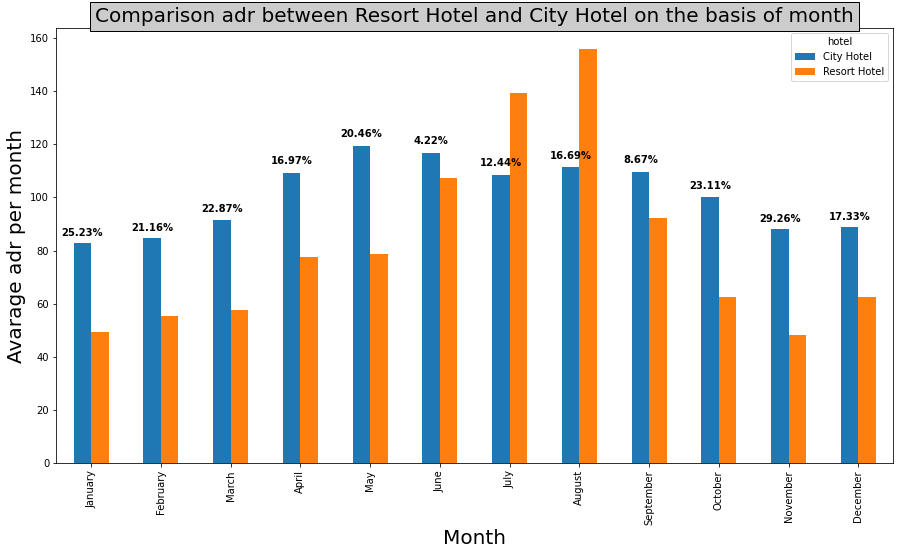

In [ ]:
monthly_adr_graph = monthly_adr.plot(kind = 'bar', y = ['City Hotel','Resort Hotel'], figsize =(15,8))
plt.title('Comparison adr between Resort Hotel and City Hotel on the basis of month',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('Avarage adr per month',fontsize = 20)
plt.xlabel('Month',fontsize = 20)

i = 0
for p in monthly_adr_graph.patches[0:12]:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2, y+height*1.03,str(monthly_adr.percentage_diff[i])+'%',ha='center',weight='bold')
  i+=1
plt.show()


**INFERENCE:**

City hotel generally collect 20-30% more revenue from the resort hotel in the month of january, february, march, april, may, october, november and december. Resort hotel revenue start increases in the month of june to september and maximum revenue collected in the month of august which is 16.69% greater than the city hotel. 

In [ ]:
hotels['market_segment'].unique()


array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

**INFERENCE:**

Market segment allow hotels to target or promote it inventory to different consumer groups.

In [ ]:
market_segment_adr = hotels.groupby('market_segment')['adr'].mean()
explode_list = market_segment_adr.tolist()
market_segment_adr

market_segment
Aviation         100.142110
Complementary      2.886213
Corporate         69.104112
Direct           105.217029
Groups            79.705914
Offline TA/TO     85.944216
Online TA        110.848395
Undefined         15.000000
Name: adr, dtype: float64

Text(0, 0.5, 'ADR')

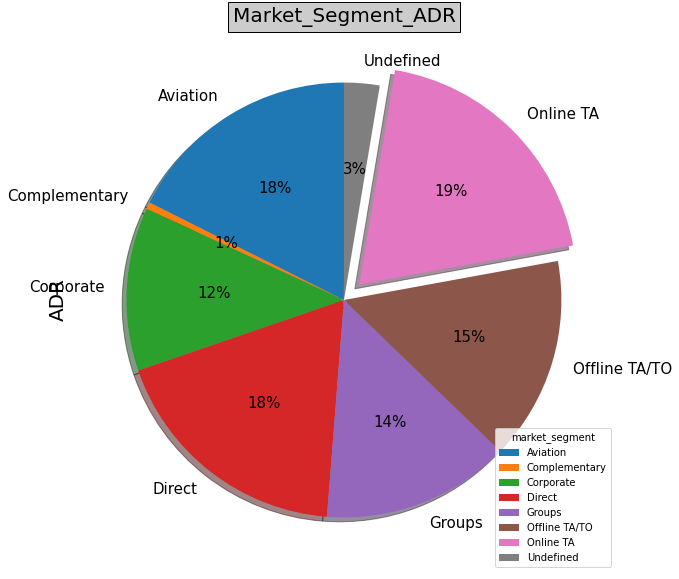

In [ ]:
# Wants to know which market segment generates more revenue
explode = [0 if elem != max(explode_list) else 0.1 for elem in explode_list]
market_segment_adr.plot(kind = 'pie', y = 'market_segment', autopct='%1.0f%%', figsize =(15,10),explode = explode, shadow = True,startangle = 90, fontsize = 15)
plt.legend(title ='market_segment',loc ='lower right')
plt.title('Market_Segment_ADR',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('ADR',fontsize = 20)

**INFERENCE:**

About 37% of revenue generated by the hotels from the online travel agency and direct market segment. 

In [ ]:
hotels['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
distribution_channel_adr = hotels.groupby('distribution_channel')['adr'].mean()
distribution_list = distribution_channel_adr.tolist()
distribution_channel_adr

distribution_channel
Corporate     69.324380
Direct        96.819780
GDS          119.533927
TA/TO         99.647408
Undefined     46.240000
Name: adr, dtype: float64

Text(0, 0.5, 'ADR')

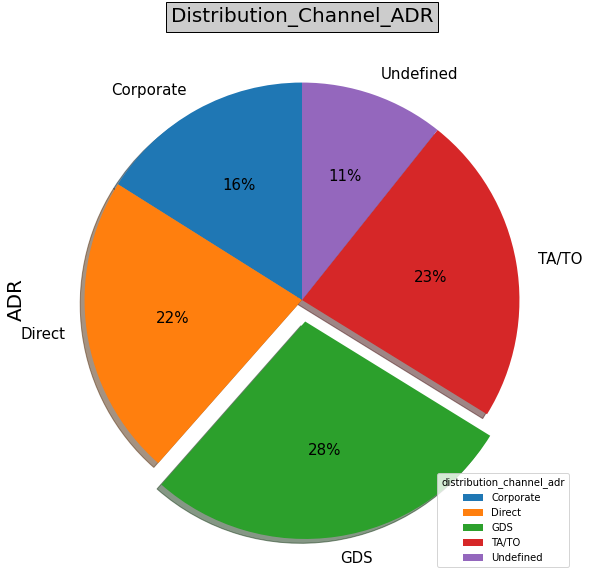

In [ ]:
# Wants to know which market segment generates more revenue
expolde_1 = [0 if elem != max(distribution_list) else 0.1 for elem in distribution_list]
distribution_channel_adr.plot(kind = 'pie', y = 'distribution_channel', autopct='%1.0f%%', figsize =(15,10),explode = expolde_1, shadow = True,startangle = 90,fontsize = 15)
plt.legend(title ='distribution_channel_adr',loc ='lower right')
plt.title('Distribution_Channel_ADR',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('ADR',fontsize = 20)

**INFERENCE:**

From global distribution system(GDS) channel hotels generate maximum profit, followed by travel agencies and tour organiser

In [ ]:

hotels['total_guest'].unique()

array([ 2.,  1.,  3.,  4.,  5., 12., 40., 26., 50., 27., 55.,  0., 20.,
        6., 10.])

In [ ]:
guest_number = hotels.loc[:,['adr','total_guest']]
guest_wise_adr = guest_number.groupby('total_guest')['adr'].mean()

Text(0.5, 0, 'Number_of_guest')

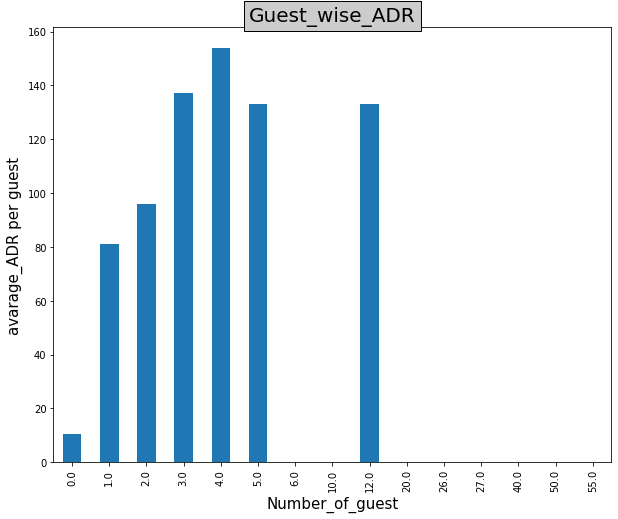

In [ ]:
guest_wise_adr.plot(kind = 'bar',figsize = (10,8))
plt.title('Guest_wise_ADR',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('avarage_ADR per guest', fontsize = 15)
plt.xlabel('Number_of_guest',fontsize = 15)

**INFERENCE:**

Number of guest leads to increase the ADR in hotels industry.

Here 0 represent that the number of guest who booked a hotel room but not check in.

Text(0, 0.5, 'ADR')

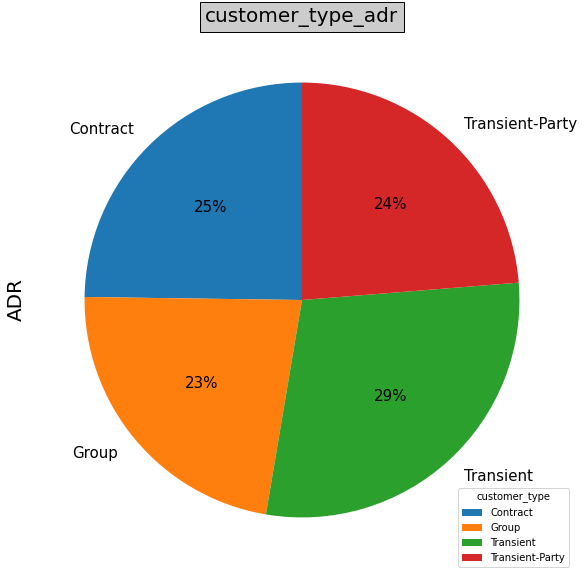

In [ ]:
customer_type_adr = hotels.groupby('customer_type')['adr'].mean()
customer_type_adr.plot(kind = 'pie', y = 'customer_type', autopct='%1.0f%%', figsize =(15,10),explode = None,startangle = 90,fontsize = 15)
plt.legend(title ='customer_type',loc ='lower right')
plt.title('customer_type_adr',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('ADR',fontsize = 20)

In [ ]:
#
Hotels_stay = hotels.groupby(['day_stay','hotel'])['day_stay'].count().unstack()
Hotels_stay.fillna(0, inplace = True)
Hotels_stay.head()

hotel,City Hotel,Resort Hotel
day_stay,,
0,331.0,381.0
1,12701.0,7550.0
2,19669.0,5816.0
3,20289.0,5240.0
4,12311.0,4326.0


In [ ]:
# Requried parking space
parking_space = pd.crosstab(hotels['required_car_parking_spaces'],hotels['hotel'])
parking_space['City Hotel'] = parking_space['City Hotel'].apply(lambda x: round((x/parking_space['City Hotel'].sum())*100,2))
parking_space['Resort Hotel'] = parking_space['Resort Hotel'].apply(lambda x: round((x/parking_space['Resort Hotel'].sum())*100,2))
parking_space

hotel,City Hotel,Resort Hotel
required_car_parking_spaces,,
0,97.56,86.52
1,2.44,13.41
2,0.00,0.06
3,0.00,0.00
8,0.00,0.01


Text(0, 0.5, 'percentage of car parking requriment')

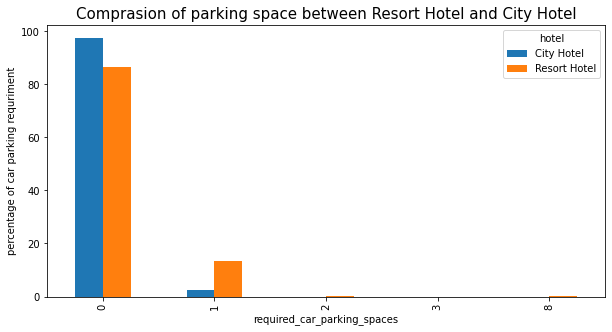

In [ ]:
parking_space.plot(kind = 'bar', y = ['City Hotel','Resort Hotel'], figsize = (10,5))
plt.title('Comprasion of parking space between Resort Hotel and City Hotel',fontsize = 15)
plt.ylabel('percentage of car parking requriment',fontsize = 10)

**INFERENCE:**

Mostly City hotels does not required any parking space, only 2.5% of guest in city hotel needs 1 parking space. For resort hotel these percentage increases as about 13.5% of guest requried 1 or more parking space

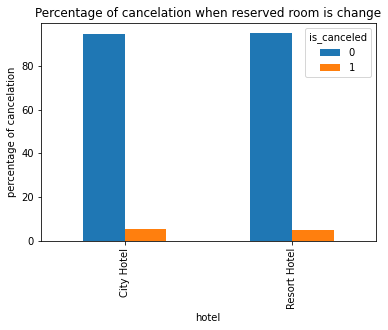

In [ ]:
changed_room_type = hotels.loc[hotels['reserved_room_type'] != hotels['assigned_room_type'],['hotel','is_canceled','reserved_room_type','assigned_room_type']]
A = pd.crosstab(changed_room_type['hotel'],changed_room_type['is_canceled'])
total = A[0]+A[1]
A[0]= round((A[0]/total)*100,2)
A[1]= round((A[1]/total)*100,2)
A.plot(kind = 'bar', title = 'Percentage of cancelation when reserved room is change', ylabel = 'percentage of cancelation')


**INFERENCE:**

Cancelation rate on changing reserved room is very low in both city and resort hotels. Its approx 5% in both types of hotels

Inference: Lead time between 

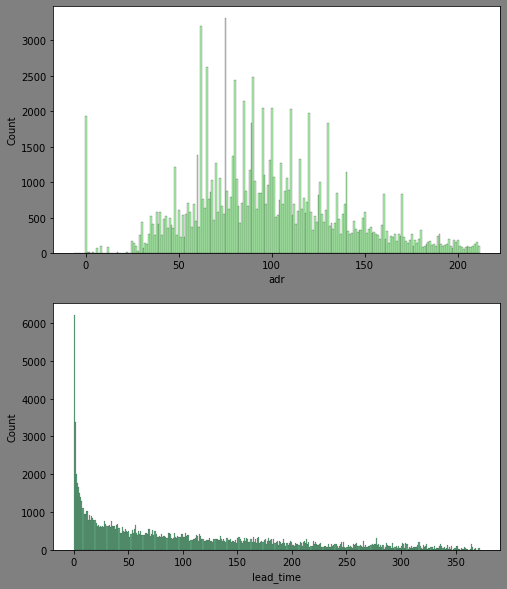

In [ ]:
fig,axs=plt.subplots(2,1,figsize=(8,10),facecolor='grey',edgecolor='orange')
sns.histplot(data=hotels,binwidth=True,x="adr",color="lightgreen",ax=axs[0])
sns.histplot(data=hotels,binwidth=True,x="lead_time",color="seagreen",ax=axs[1])

In [ ]:
#segment_month

**INFERENCE:**



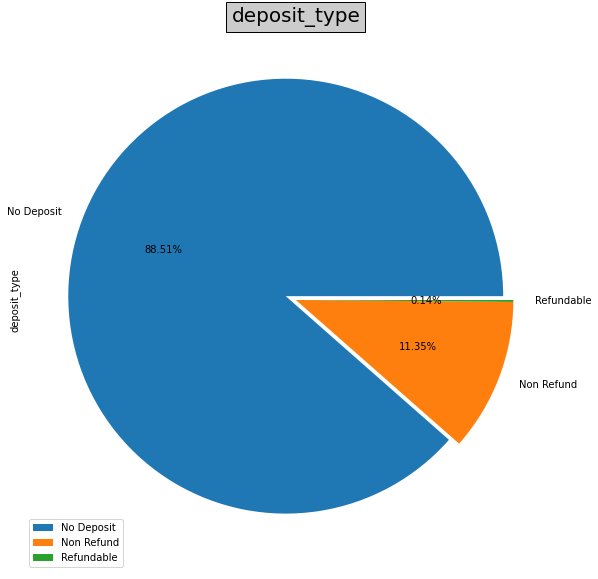

In [ ]:

# def make_pieplot(data,explode=[0,0,0,0,0,0]):
#   req_data=dict(data.value_counts())
#   marketing_options_names=np.array(list(req_data.keys()))
#   marketing_options_values=np.array(list(req_data.values()))
#   #print(marketing_options_values)
#   percent=((marketing_options_values)/marketing_options_values.sum())*100.
#   patches,texts=plt.pie(marketing_options_values,rotatelabels=True,radius= 3,explode=explode)
#   plt.title("Deposite_Type")
#   labels = ['{0}- {1:1.2f} %'.format(i,j) for i,j in zip(marketing_options_names, percent)]
#   plt.legend(patches, labels, loc='center left',  fontsize=12)
make_pieplot(hotels["deposit_type"],"deposit_type","deposit_type")

In [ ]:
agents=hotels["agent"].value_counts()
top_agents=agents.iloc[0:10].index
agents_notreq=agents[agents<=3].index    #we do not require agents who are  not very active
agents_notreq

Float64Index([ 25.0, 258.0, 420.0, 167.0, 302.0, 370.0, 535.0, 321.0, 391.0,
              232.0, 303.0, 283.0, 269.0, 227.0, 106.0, 211.0, 122.0, 449.0,
              454.0, 135.0, 414.0, 179.0, 282.0,  61.0, 331.0, 384.0, 469.0,
              427.0, 107.0, 510.0, 476.0, 438.0, 346.0, 450.0, 358.0, 304.0,
               59.0, 451.0,  54.0, 291.0, 416.0, 397.0, 299.0, 197.0,  73.0,
              165.0, 444.0, 408.0, 461.0, 388.0, 453.0, 337.0, 480.0, 432.0,
              431.0, 294.0, 433.0, 483.0, 472.0, 446.0, 114.0,  70.0, 300.0,
              301.0, 352.0,  93.0,  90.0, 117.0, 367.0, 158.0, 144.0, 213.0,
              216.0, 406.0, 267.0, 333.0, 247.0, 278.0, 280.0, 285.0, 289.0,
              265.0, 497.0],
             dtype='float64')

In [ ]:
#reserved room : to check which room is demanded most
demanded_room=hotels["reserved_room_type"].value_counts()
demanded_room

A    82391
D    18512
E     5899
F     2212
G     1368
B     1104
C      691
H      394
P       12
L        6
Name: reserved_room_type, dtype: int64

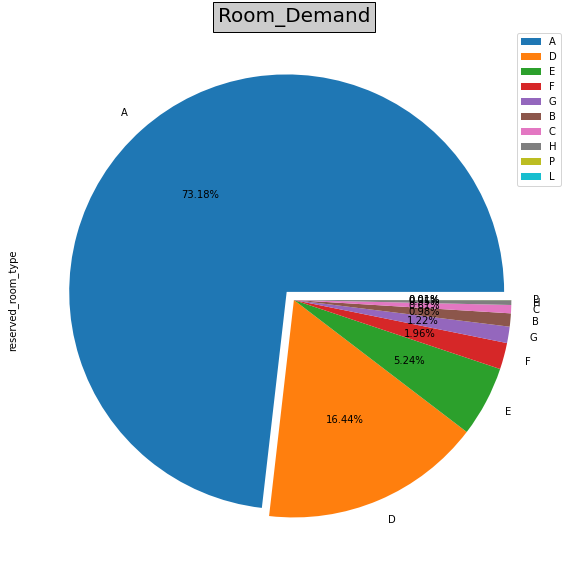

In [ ]:
make_pieplot(hotels["reserved_room_type"],"reserved_room_type",'Room_Demand')